In [31]:
%matplotlib inline
import numpy as np
from scipy import signal, fftpack
from matplotlib import pyplot as plt

sig_in =np.round(2**14*np.random.randn(131072))

# define signal rate
Fs = 1.28125e9
F_width = 100e6;
F_offset = 0;
N_samples = 131072;
t = np.arange(N_samples)

# define fundamental frequency
fundamental_freq = Fs / (N_samples);

freq_tone = int(F_offset / fundamental_freq) * fundamental_freq;

sig_dc = np.round((2**15-1)*(np.cos(2*np.pi*freq_tone/Fs*t) + 1j*np.sin(2*np.pi*freq_tone/Fs*t)))
sig_in_full = np.zeros(N_samples)
for x, item in enumerate(sig_in):
    if (item > 0):
        sig_in_full[x] = 32767
    else:
        sig_in_full[x] = -32767


# create a filter to shape the noise
coeffs = signal.firwin(350,F_width/Fs)

# filter
sig_out = signal.convolve(sig_in, coeffs)
sig_out_full = signal.convolve(sig_in_full, coeffs)
#sig_out = sig_out[0:131072]
sig_out = sig_out[-131072 :]
sig_out_full = sig_out_full[-131072 :]

# offset
sig_out = (sig_out * sig_dc) / 32767;
sig_out_full = (sig_out_full * sig_dc) / 32767;

max_value = np.max(sig_out);
max_value_full = np.max(sig_out_full)

In [32]:

# figure out ratio so we're always using most of the bits

#dBFs = 20*log10(value/32767)
# 10**(dBFs/20)*32767
dBFs = 0
desired_max = 10**(dBFs/20)*32767

ratio = desired_max / max_value ;
ratio_full = desired_max / max_value_full
sig_out = sig_out * ratio
sig_out_full = sig_out_full * ratio_full

print(np.max(sig_out))
file_out = open('data.txt', 'w')
sig_out = (np.round(sig_out))
print(np.max(sig_out_full))

(32767+0j)
(32766.999999999996+0j)


C:\Users\zstechly\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(151.13195376989296+10.714584630166078j)


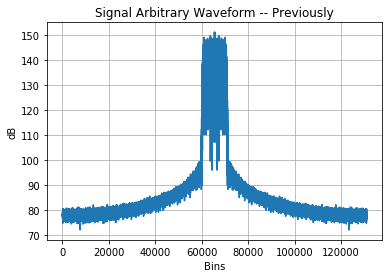

In [33]:
fftsig = 20*np.log10(fftpack.fftshift(fftpack.fft(sig_out)))
plt.plot(fftsig)
plt.grid(True)
plt.xlabel('Bins')
plt.ylabel('dB')
plt.title('Signal Arbitrary Waveform -- Previously')
print(f'{np.max(fftsig)}')

C:\Users\zstechly\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(151.40584148921025+20.1648221531836j)


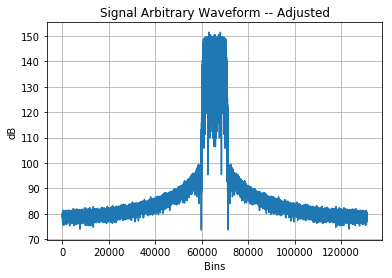

In [34]:
fftsig = 20*np.log10(fftpack.fftshift(fftpack.fft(sig_out_full)))
plt.plot(fftsig)
plt.grid(True)
plt.xlabel('Bins')
plt.ylabel('dB')
plt.title('Signal Arbitrary Waveform -- Adjusted')
print(f'{np.max(fftsig)}')

C:\Users\zstechly\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


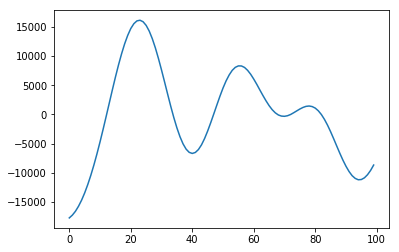

In [39]:
plt.plot(sig_out_full[0:100])

C:\Users\zstechly\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


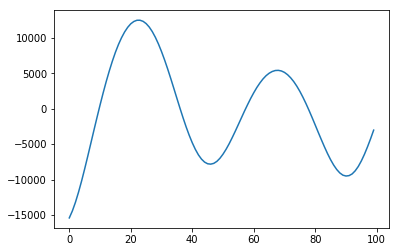

In [43]:
plt.plot(sig_out[0:100])